# Cleaning NBA data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib incline

In [2]:
stats = ['pts', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'tov', 'blk']

# Key: pts = points, min = minute, fgm = field goal made, fga = field goal attempted
# fg3pm = field goal 3 pointer made, fgpa = fielg goal 3 pointer attempted, ftm = free throw made
# fta = free throw attempted, oreb = offensive rebound, dreb = defensive rebound
# ast = assist, stl = steal, tov = turnover, blk = block

In [3]:
# Read in per game data from csv folder 
df = pd.read_csv('../nba-stats-model/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)
# all stats are per game

In [4]:
# df.head(10)
# df.tail(10)
# df.sample(10)
# used df.head(), df.tail(), df.sample() methods to explore data and ensure completeness

In [5]:
list(df)
# listed all column headers 

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [6]:
df_cleaned = df.dropna(how = 'all')
# used the .dropna() method to erase rows with missing values
# dropped rows with missing values in all column headers

In [7]:
df_cleaned['gp'].describe()
# # eliminate outliers, mostly from the lower end 
# looking at the mean 'games played', I want to see how many players played 3 standard deviations away from mean (lower end)
# drop these players so they don't bring down the model

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [8]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)
min_gp
# calculated minimum games played for players 3 standard deviations away from mean
# returns a negative value, try a different path

-22.712012335693153

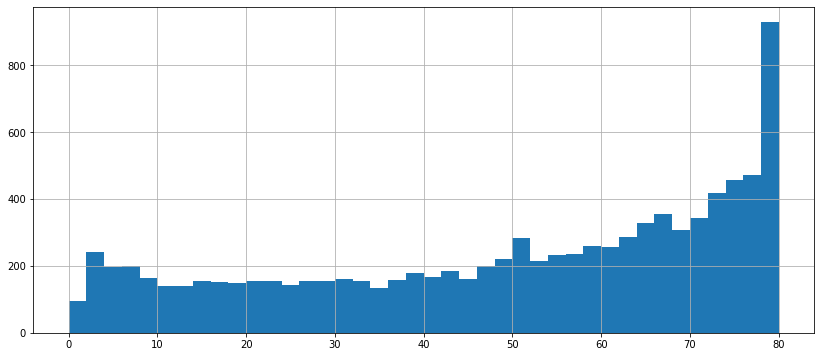

In [9]:
bin_values = np.arange(start = 0, stop = 82, step = 2)
df_cleaned['gp'].hist(bins = bin_values, figsize = [14,6])
# using np to create a histogram of frequency vs. number games played
# create axes labels 

In [10]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [11]:
original_count = df_cleaned['player_id'].count()
filtered_count = df_filter['player_id'].count()
print(original_count - filtered_count)
# calculating how many players or rows were dropped from the original

971


# Normalizing Data Across Seasons

In [12]:
season = (df_filter['season_id'] == '2017-18')
# df_filter is our master df 

In [13]:
df_2018 = df_filter[season]
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9936,201144,2017-18,12.0,30.0,31.1,5.3,14.0,0.381,2.0,6.4,...,4.4,5.5,0.803,0.0,2.3,4.1,1.5,1.0,0.3,17.1
9597,201167,2017-18,53.0,32.0,12.9,1.2,3.1,0.401,0.5,1.3,...,0.4,0.5,0.846,0.1,1.2,0.6,0.4,0.1,0.2,3.4
9709,202734,2017-18,82.0,29.0,31.5,5.2,10.1,0.508,1.6,3.7,...,0.6,0.8,0.706,0.7,2.2,2.3,1.2,1.0,0.1,12.5
9652,1627814,2017-18,15.0,25.0,27.0,4.1,10.1,0.408,1.0,4.0,...,1.5,1.9,0.759,0.7,4.0,1.9,0.9,1.3,0.1,10.7
9773,1627751,2017-18,82.0,22.0,18.6,3.1,4.7,0.659,0.0,0.0,...,0.7,1.2,0.594,2.0,2.8,0.7,1.0,0.5,1.2,6.9
9710,202334,2017-18,78.0,29.0,18.9,2.2,3.7,0.582,0.0,0.0,...,0.9,1.4,0.667,2.3,5.0,0.5,0.8,0.4,0.7,5.3
9721,101141,2017-18,69.0,31.0,25.1,4.0,8.9,0.452,1.3,3.7,...,1.5,2.0,0.778,1.7,4.2,1.3,1.0,0.9,0.4,10.9
10093,201163,2017-18,74.0,31.0,31.7,3.8,8.5,0.445,1.2,3.3,...,1.2,1.5,0.772,1.4,4.0,2.1,1.2,0.6,0.5,10.0
10015,1628400,2017-18,73.0,23.0,15.8,0.9,2.6,0.346,0.5,1.7,...,0.3,0.6,0.610,0.5,1.7,0.3,0.3,0.3,0.1,2.7
9596,203382,2017-18,81.0,31.0,18.3,2.6,5.5,0.471,0.0,0.3,...,0.7,1.0,0.756,1.6,3.8,1.1,1.0,0.3,0.6,6.0


In [14]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())
# equation to normalize 

/Users/jyu/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_2018.sort_values('pts_norm', ascending = False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [16]:
def normalize(col): 
    return (col - col.min()) / (col.max() - col.min())
# created function to normalize other stats

In [17]:
normalize(df_2018['ast'].head(10))
# exmaple of normalized assists

9563    0.046512
9564    0.441860
9567    0.023256
9569    1.000000
9570    0.093023
9571    0.186047
9573    0.139535
9574    0.046512
9575    0.000000
9576    0.372093
Name: ast, dtype: float64

In [18]:
cols_to_norm = ['pts', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'tov', 'blk']

In [19]:
# created for loop to normalize other stats more efficiently
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [20]:
# function call vorp on df_2018 and set it to a new variable
df_2018_norm = vorp(df_2018)

/Users/jyu/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9758,1627826,2017-18,43.0,21.0,9.5,1.4,2.8,0.500,0.0,0.0,...,0.000000,0.00,0.103448,0.118812,0.196078,0.149533,0.058252,0.083333,0.12,0.115385
10069,204020,2017-18,72.0,26.0,28.5,4.3,9.9,0.435,1.7,4.5,...,0.404762,0.45,0.172414,0.178218,0.098039,0.261682,0.223301,0.333333,0.22,0.192308
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10014,203930,2017-18,52.0,28.0,12.3,2.1,5.7,0.374,0.9,2.8,...,0.214286,0.28,0.137931,0.138614,0.019608,0.130841,0.087379,0.125000,0.14,0.038462
9699,1628378,2017-18,79.0,21.0,33.4,7.5,17.2,0.437,2.4,7.0,...,0.571429,0.70,0.344828,0.376238,0.137255,0.271028,0.359223,0.625000,0.54,0.115385
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,0.428571,0.50,0.540230,0.643564,0.235294,0.682243,0.883495,0.583333,0.84,0.346154
9911,201158,2017-18,80.0,32.0,24.3,4.2,9.6,0.441,1.9,4.9,...,0.452381,0.49,0.218391,0.198020,0.058824,0.130841,0.184466,0.333333,0.24,0.076923
9974,1626192,2017-18,82.0,25.0,18.1,2.0,4.8,0.423,0.9,2.6,...,0.214286,0.26,0.057471,0.049505,0.078431,0.121495,0.106796,0.125000,0.10,0.115385
9998,203496,2017-18,80.0,27.0,31.6,4.3,10.5,0.413,2.5,6.9,...,0.595238,0.69,0.172414,0.168317,0.137255,0.420561,0.194175,0.708333,0.32,0.346154
9718,201569,2017-18,69.0,29.0,31.2,6.0,14.1,0.428,3.2,8.8,...,0.761905,0.88,0.321839,0.346535,0.078431,0.177570,0.213592,0.250000,0.38,0.153846


In [22]:
# group df by season id, get ppg average of each season 
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [23]:
df_filter_norm = df_filter.groupby(['season_id']).apply(vorp)
df_filter_norm.sample(10)
# normalized data across every stat column for every player in every season

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
4148,1761,2005-06,73.0,29.0,24.1,2.5,5.7,0.434,1.2,3.3,...,0.352941,0.392857,0.063830,0.069565,0.108108,0.242424,0.161905,0.480000,0.189189,0.090909
1988,468,2000-01,62.0,31.0,16.3,1.7,4.1,0.404,0.7,2.1,...,0.259259,0.283784,0.120482,0.091603,0.073171,0.119565,0.214286,0.166667,0.219512,0.027027
3570,2243,2004-05,54.0,27.0,21.6,2.4,6.1,0.398,0.4,1.3,...,0.137931,0.162500,0.114943,0.123810,0.384615,0.278846,0.139130,0.206897,0.260870,0.090909
2280,359,2001-02,18.0,34.0,5.1,0.6,1.5,0.370,0.0,0.0,...,0.000000,0.000000,0.012658,0.009346,0.120000,0.129032,0.018519,0.035714,0.051282,0.057143
3276,2038,2003-04,17.0,24.0,20.3,1.1,2.9,0.360,0.0,0.0,...,0.000000,0.000000,0.111111,0.178218,0.413043,0.416667,0.043478,0.125000,0.232558,0.277778
5033,2248,2007-08,78.0,29.0,29.1,4.3,9.6,0.454,0.6,1.7,...,0.200000,0.232877,0.170732,0.174312,0.146341,0.198113,0.586207,0.333333,0.500000,0.027778
2926,1565,2002-03,47.0,28.0,5.3,0.3,0.8,0.378,0.0,0.0,...,0.000000,0.000000,0.025974,0.027778,0.086957,0.053571,0.011236,0.000000,0.027778,0.093750
8262,202066,2014-15,52.0,29.0,14.1,1.3,3.3,0.400,0.6,1.7,...,0.166667,0.209877,0.079545,0.088235,0.094340,0.120000,0.099010,0.347826,0.159091,0.068966
4744,2399,2006-07,82.0,26.0,31.5,4.7,10.4,0.452,0.9,2.7,...,0.300000,0.333333,0.290698,0.307692,0.227273,0.386139,0.241379,0.476190,0.414634,0.090909
3356,714,2003-04,72.0,31.0,38.6,7.1,16.1,0.443,2.1,5.1,...,0.700000,0.586207,0.319444,0.267327,0.239130,0.305556,0.315217,0.500000,0.255814,0.138889


# Player Distance Function


In [24]:
# percent error - how close are players on any given stat
# 2 players serve as two points, and find the 10 players with the shortest distance
# get distance for 2 numpy arrays, but need one number to focus on

def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# returns euclidian distance

In [25]:
df1 = pd.read_csv('../nba-stats-model/nba-stats-csv/player_id_player_name.csv')
df2 = pd.read_csv('../nba-stats-model/nba-stats-csv/player_general_traditional_per_game_data.csv', usecols = ['player_id', 'season_id', 'pts'])

In [26]:
df2.sample(5)

,player_id,season_id,pts
189,731,1996-97,7.3
1792,1884,2000-01,13.8
8742,202339,2015-16,20.4
8684,203991,2015-16,7.0
8972,203112,2015-16,5.2


In [27]:
df3 = pd.merge(df1, df2, on = 'player_id', how = 'left')
df3.sample(5)

,player_id,player_name,season_id,pts
1488,201145,Jeff Green,2016-17,9.2
1002,202339,Eric Bledsoe,2011-12,3.3
3330,2617,Udonis Haslem,2018-19,2.5
2330,201563,Michael Beasley,2017-18,13.2
2013,202498,Lance Thomas,2014-15,7.1


In [28]:
df_2019 = df3[df3['season_id'] == '2018-19']
df_2019.sample(5)

,player_id,player_name,season_id,pts
961,2548,Dwyane Wade,2018-19,15.0
1829,202689,Kemba Walker,2018-19,25.6
2082,101150,Lou Williams,2018-19,20.0
419,203998,Bruno Caboclo,2018-19,8.3
1785,203200,Justin Holiday,2018-19,10.5


In [29]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [30]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [31]:
calc_distance(dame_ppg, curry_ppg)
# taking abs value, order doesn't matter

1.5

In [32]:
calc_distance(dame_ppg, rudy_ppg)

9.9

# Find Player Function

In [33]:
# used for previous lakers dict
# for row in lakers_df.itertuples():
    #print(row.first_name, row.last_name, row.ppg)

In [34]:
dataframe = pd.read_csv('../nba-stats-model/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [35]:
df_example = dataframe.sample(10)


In [36]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2014-15 203932
2002-03 255
2017-18 1627772
2017-18 201578
2006-07 2772
2016-17 201950
2009-10 201149
2017-18 203499
2017-18 1626154
2005-06 673


In [37]:
#if x == row.season_id and y == row.player_id:
    #return row

In [38]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [39]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
8111,203932,2014-15,47.0,19.0,17.0,2.0,4.4,0.447,0.3,1.0,...,0.9,1.3,0.721,1.0,2.6,0.7,0.8,0.4,0.5,5.2
2798,255,2002-03,29.0,30.0,29.0,5.2,10.6,0.492,0.0,0.1,...,4.1,5.0,0.819,1.4,5.7,4.2,2.9,1.0,0.4,14.5
9654,1627772,2017-18,6.0,22.0,4.6,0.8,1.8,0.455,0.3,0.8,...,0.0,0.0,0.000,0.0,0.8,1.3,0.3,0.2,0.0,2.0
9923,201578,2017-18,52.0,30.0,13.0,2.7,6.7,0.395,1.7,4.5,...,0.8,1.1,0.727,0.4,2.2,0.8,0.8,0.2,0.4,7.7
4864,2772,2006-07,57.0,21.0,22.4,3.5,6.5,0.539,0.0,0.1,...,1.9,3.0,0.620,1.7,2.6,1.1,1.5,1.0,0.3,8.9
9325,201950,2016-17,67.0,27.0,32.7,6.0,13.3,0.454,1.5,4.2,...,1.8,2.5,0.708,0.7,3.3,7.3,2.9,1.5,0.7,15.4
5995,201149,2009-10,64.0,25.0,30.1,4.1,8.1,0.504,0.0,0.0,...,2.5,3.4,0.744,3.4,7.6,2.1,1.8,0.5,1.6,10.7
10019,203499,2017-18,54.0,25.0,14.3,1.6,4.1,0.384,0.6,1.6,...,0.6,0.7,0.865,0.3,1.4,1.8,0.6,0.5,0.0,4.3
9986,1626154,2017-18,5.0,24.0,9.0,1.4,4.0,0.350,0.6,2.8,...,0.4,0.4,1.000,0.0,1.0,0.6,0.4,0.6,0.0,3.8
3982,673,2005-06,51.0,33.0,10.4,0.9,1.8,0.516,0.0,0.0,...,0.6,1.0,0.673,1.2,1.5,0.2,0.4,0.2,0.2,2.5


In [40]:
find_player(1712, '2008-09')

In [41]:
find_player(1712, '2020-21')

In [42]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row
        # added df as a parameter and changed df_example to regular 'df'

In [43]:
dataframe.dtypes

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [44]:
player = 2544
season = '2012-13'

In [45]:
find_player(dataframe, player, season)
# LBJ stats 2012-13

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [46]:
current_player_season = '2016-17'
current_player_id = 201950

In [47]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-model/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [48]:
df_cleaned = df.dropna(how = 'all')
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [49]:
cols_to_norm = ['pts', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'ast', 'stl', 'tov', 'blk']

In [50]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [51]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [52]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()

/Users/jyu/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [53]:
jrue_pts_norm

0.474025974025974

In [54]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item()
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
]

/Users/jyu/nba-pandas-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


TypeError: 'float' object is not callable

In [4]:
#current_player_vector = np.array()

In [56]:
#vfunc = np.vectorize(calc_distance)

In [1]:
#distance_vect = vfunc(current_player_vector, compared_player_vector)

In [2]:
#number = np.sum(np.abs(distance_vect)) / len(distance_vect)

# Comparing Multiple Players in a For Loop

In [59]:
player_distance = []

In [60]:
df_sample = df_norm.sample(10)

In [61]:
df_sample.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
8355,203948,2014-15,34.0,22.0,10.8,1.3,3.5,0.367,0.0,0.0,...,0.000000,0.000000,0.045455,0.078431,0.150943,0.100000,0.039604,0.043478,0.159091,0.034483
919,82,1998-99,38.0,36.0,11.8,1.6,4.7,0.348,0.0,0.0,...,0.000000,0.000000,0.064935,0.058824,0.083333,0.152174,0.046296,0.111111,0.083333,0.076923
5618,201158,2008-09,42.0,23.0,21.0,3.3,7.5,0.442,1.2,3.1,...,0.428571,0.442857,0.111111,0.112150,0.046512,0.126316,0.190909,0.321429,0.342105,0.000000
1269,959,1998-99,40.0,25.0,31.7,2.9,7.9,0.363,1.2,3.3,...,0.428571,0.464789,0.129870,0.117647,0.145833,0.206522,0.509259,0.333333,0.555556,0.025641
645,1521,1997-98,45.0,23.0,9.3,1.0,2.7,0.361,0.1,0.2,...,0.043478,0.033898,0.141026,0.131579,0.014706,0.072165,0.180952,0.076923,0.314286,0.000000
5500,255,2008-09,82.0,36.0,29.8,4.8,9.1,0.523,0.3,0.9,...,0.107143,0.128571,0.244444,0.252336,0.186047,0.410526,0.209091,0.392857,0.368421,0.241379
9348,203114,2016-17,29.0,25.0,30.7,5.2,11.5,0.450,1.6,3.6,...,0.390244,0.360000,0.304348,0.293578,0.093023,0.366337,0.297297,0.700000,0.375000,0.076923
7377,202951,2012-13,39.0,27.0,16.8,2.5,6.4,0.396,0.6,1.9,...,0.171429,0.246753,0.127907,0.156863,0.036364,0.088235,0.216216,0.125000,0.333333,0.033333
4633,2574,2006-07,67.0,26.0,26.4,4.1,8.4,0.494,1.6,3.1,...,0.533333,0.382716,0.104651,0.096154,0.090909,0.198020,0.103448,0.285714,0.219512,0.000000
4025,2250,2005-06,75.0,26.0,33.8,4.9,10.8,0.453,1.4,3.3,...,0.411765,0.392857,0.234043,0.234783,0.324324,0.323232,0.219048,0.440000,0.432432,0.090909


In [62]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,     
    row.fga_norm,     
    row.fg3m_norm,     
    row.fg3a_norm,     
    row.ftm_norm,     
    row.fta_norm,  
    row.oreb_norm,     
    row.dreb_norm,     
    row.ast_norm,  
    row.stl_norm,     
    row.tov_norm,     
    row.blk_norm     
    ])
    
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with' + str(player) + '. Percent error was' + str(number))

NameError: name 'current_player_vector' is not defined

In [63]:
player_distance

[]

In [65]:
#df_sample['distance'] = player_distance

In [66]:
#ranked_df = df_sample.sort_values('distance')

In [67]:
#ranked_df.head(10)

In [68]:
#df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [69]:
#df_final = pd.merge(ranked_df, df1, on = ['player_id', 'season_id', how = 'left']).drop_duplicates()

In [70]:
#df_final = df_final[['player_name', 'player_id', 'season_id', 'distance']]

# Weighting Stat Projections

In [71]:
#season_list = []

In [72]:
# season_id = '2014-15'
# value = season_list.index(season_id)
# print(value)
# returns index value

In [73]:
# current_season=season_list[(season_list.index(season_id))]
# print(current_season)

In [74]:
# next_saeason = season_list[(season_list.index(season_id)+1)]
#print(next_season)

In [75]:
#ranked_df.head(10)

In [76]:
# print(current_player_id)
# print(current_player_season)

In [77]:
# test_df = ranked_df.iloc[0]

In [78]:
# weight = (1 / test_df.distance)
# print(weight)

In [79]:
# stats = ['']

In [80]:
# projected_stats = {}

In [81]:
# for col in stats:
    # sum_stats = test_df[col] + weight
    # projected_stats['proj_' + col] = (sum_stat/weight)

In [82]:
# projected_stats

In [83]:
# projected_stats = {}

In [84]:
# sum_stat = 0
# sum_weight = 0

In [85]:
# for row in ranked_df.itertuples():
    # weight = (1 / row.distance)
    # sum_stat += row.pts * weight
    # sum_weight += weight 

In [86]:
# proj_points = (sum_stat / sum_weight)
# proj_points

In [87]:
# projected stats for a player in a dict (using compared players current season)
# for col in stats:
    #sum_stat = 0
    #sum_weight = 0
    #for index, row in ranked_df.iterrows():
        #weight = (1 / row.distance)
        #sum_stat += row[col] * weight
        #sum_weight += weight
    #projected_stats['player_id'] = current_player_id
    #projected_stats['proj_season_id'] = season_list[(season_list.index(season_id)+1)]
    #projected_stats['proj_' + col] = (sum_stat / sum_weight)

# Getting Weighted Average Using Multiple Players Next Season

In [88]:
# for col in stats:
    #sum_stat = 0
    #sum_weight = 0
    #for index, row in ranked_df.iloc[1:11].iterrows():
        #if row.season_id == '2017-19':
            #continue
        #weight = (1 / row.distance)
        #next_season = season_list[(season_list.index(row.season_id) +1)]
        #player_next_season = find_player(ranked_df, row.player_id, next_season)
        #if player_next_season == None:
            #continue
        #sum_stat += getattr(player_next_season, col) * weight
        #sum_weight += weight 
    #projected_stats['player_id'] = cuurent_player_id
    #projected_stats['proj_season_id'] = seaosn_list[(season_list.index(current_player_season) + 1)]
    #projected_stats['proj_' + col] = (sum_stat / sum_weight)